<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/7)_A)_ON_Tweet_Topic_Modeling___LDA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Latent Dirichlet Allocation (LDA) will be used to analyze tweets and identify themes discussed in relation to covid-19 

In [ ]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis

!pip install -U scikit-learn # updating sklearn to avoid depreciation warnings
!pip install --upgrade pandas==1.2  # Need to upgrade pandas to get pyLDAvis to work 

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

In [ ]:
# now Im going to upload my test set - which is just my Ontario covid tweets data scraped using sncrape
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_COVID19_TWEETS_SENTS.csv')
tweets_df = data.iloc[:, 1:]
tweets_df.drop_duplicates('Text', inplace=True)

In [ ]:
tweets_list = tweets_df['Text'].tolist()

# LDA w/ Sklearn

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf = tf_vectorizer.fit_transform(tweets_list) # document-term matrix
alpha = .45     #Dirichlet prior of document-topic dist
beta = 0.05   #Dirichlet prior of topic-term dist

In [ ]:
# 4 TOPICS 
lda_model4 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf) # pre-trained LDA model

In [ ]:
lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 8 TOPICS
# lda_model8 = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 16 TOPICS
# lda_model16 = LatentDirichletAllocation(n_components=16, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 20 TOPICS
# lda_model20 = LatentDirichletAllocation(n_components=20, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# A model with a lower perplexity (exp(-1. * log-likelihood per word)) and higher log-likelihood is ideal 
print('Model Perplexity - 4 Topics:',lda_model4.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 4 Topics:', lda_model4.score(tf))

# print('Model Perplexity - 8 Topics:',lda_model8.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 8 Topics:', lda_model8.score(tf))

# print('Model Perplexity - 16 Topics:',lda_model16.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 16 Topics:', lda_model16.score(tf))

# print('Model Perplexity - 20 Topics:',lda_model20.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 20 Topics:', lda_model20.score(tf))

Model Perplexity - 4 Topics: 24384.236496823145
Model Log-Likelihood - 4 Topics: -82433192.07037537


In [ ]:
# Looking at our scores above, the best performing k is 4 topics because it has the lowest perplexity and highest log-likelihood compared to the other k values
  # Therefore, I will try some k values around 4 to see if any better scores can be achieved

In [ ]:
# 2 TOPICS
# lda_model2 = LatentDirichletAllocation(n_components=2, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 3 TOPICS
# lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 5 TOPICS
# lda_model5 = LatentDirichletAllocation(n_components=5, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 6 TOPICS
# lda_model6 = LatentDirichletAllocation(n_components=6, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# print('Model Perplexity - 2 Topics:',lda_model2.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 2 Topics:', lda_model2.score(tf))

print('Model Perplexity - 3 Topics:',lda_model3.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 3 Topics:', lda_model3.score(tf))

# print('Model Perplexity - 5 Topics:',lda_model5.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 5 Topics:', lda_model5.score(tf))
 
# print('Model Perplexity - 6 Topics:',lda_model6.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 6 Topics:', lda_model6.score(tf))

Model Perplexity - 3 Topics: 24831.321978218446
Model Log-Likelihood - 3 Topics: -82581456.87842429


In [ ]:
# Topic words 
for index, topic in enumerate(lda_model4.components_):
    print(f'Top 15 words for Topic #{index}')
    print([tf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-26:]])
    print('\n')

Top 15 words for Topic #0
['time', 'live', 'long', 'wo nt', 'tell', 'wo', 'say', 'wear', 'let', 'year', 'want', 'kid', 'flu', 'need', 'like', 'think', 'work', 'stop', 'vaccine', 'mask', 'know', 'spread', 'people', 'virus', 'covid', 'nt']


Top 15 words for Topic #1
['lose', 'essential', 'public', 'patient', 'family', 'ltc', 'lockdown', 'need', 'open', 'stay', 'life', 'sick', 'hospital', 'work', 'worker', 'business', 'day', 'pandemic', 'pay', 'care', 'die', 'health', 'home', 'people', 'death', 'covid']


Top 15 words for Topic #2
['result', 'coronavirus', 'lie', 'federal', 'use', 'travel', 'control', 'need', 'time', 'canadian', 'like', 'country', 'positive', 'government', 'look', 'people', 'money', 'help', 'testing', 'rate', 'come', 'canada', 'pandemic', 'virus', 'test', 'covid']


Top 15 words for Topic #3
['thank', 'public', 'fail', 'today', 'doug ford', 'start', 'teacher', 'good', 'say', 'covid case', 'time', 'number', 'response', 'need', 'government', 'premier', 'province', 'plan', 

In [ ]:
# Creating LDA plot of best topic # 
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model4, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)   

In [ ]:
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model3, tf, tf_vectorizer)                 
pyLDAvis.display(display_data) 

In [ ]:
# Getting predicted topic for each tweet 
tweet_topics = lda_model4.transform(tf)

Topic_Assigned = [] 
for t in range(tweet_topics.shape[0]):
  predicted_topic = tweet_topics[t].argmax()
  Topic_Assigned.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic'] = Topic_Assigned
tweets_df[:3]

[1, 2, 1, 3, 0, 0, 0, 1, 1, 0]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...,-0.8360,8.200,negative,1
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...,-0.4767,26.165,negative,2
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...,-0.3818,30.910,negative,1


In [ ]:
# Getting predicted topic for each tweet 
tweet_topics3 = lda_model3.transform(tf)

Topic_Assigned3 = [] 
for t in range(tweet_topics3.shape[0]):
  predicted_topic = tweet_topics3[t].argmax()
  Topic_Assigned3.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic_3'] = Topic_Assigned3
tweets_df[:3]

[1, 2, 1, 3, 0, 0, 0, 1, 1, 0]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_3
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...,-0.8360,8.200,negative,1,1
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...,-0.4767,26.165,negative,2,2
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...,-0.3818,30.910,negative,1,1


In [ ]:
# Adding LDA topics to dataframe and saving it 
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_COVID19_TWEETS_TOPICS.csv')

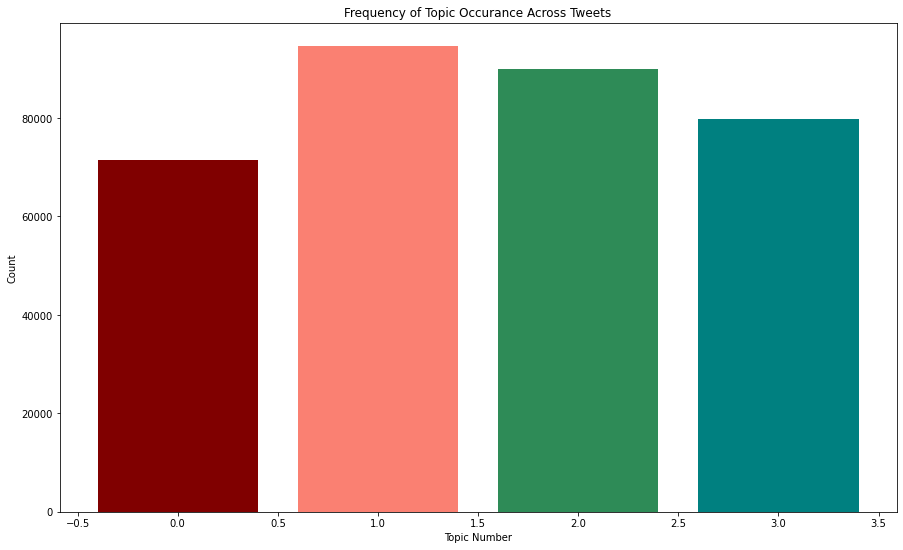

In [ ]:
num_topics = tweets_df['Topic'].unique()
topic_counts = tweets_df['Topic'].value_counts()

plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'seagreen', 'teal', 'maroon'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Topic Occurance Across Tweets")
plt.rc('figure', figsize=(15,9))
plt.show()

In [ ]:
def get_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keys = get_topics(tf_vectorizer, lda_model4, 100)

df_topic_keys = pd.DataFrame(topic_keys)
df_topic_keys.columns = ['Word '+str(i) for i in range(df_topic_keys.shape[1])]
df_topic_keys.index = ['Topic '+str(i) for i in range(df_topic_keys.shape[0])]

In [ ]:
# Getting top words for each topic 
Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4']
df_topic_keys['topic_theme'] = Topics_theme
df_topic_keys.set_index('topic_theme', inplace=True)
print(df_topic_keys.T)

topic_theme        Topic1    Topic2    Topic3    Topic4
Word 0                 nt     covid     covid  pandemic
Word 1              covid     death      test   ontario
Word 2              virus    people     virus     covid
Word 3             people      home  pandemic      case
Word 4             spread    health    canada      ford
...                   ...       ...       ...       ...
Word 95            common  facility      high     close
Word 96           nt work     bring      odsp      high
Word 97            effect      list     curve     learn
Word 98      virus spread      high       gov  announce
Word 99       stop spread      city   instead    ignore

[100 rows x 4 columns]


In [ ]:
df_topic_keys.T.to_csv('/content/drive/MyDrive/Colab Notebooks/TOPIC_WORDS_ON_R.csv')